# DASK
Let's use EOReader with Dask.

<div class="alert alert-info">
  
<strong>Note:</strong> This is experimental for now, use it at your own risk !
    
</div>

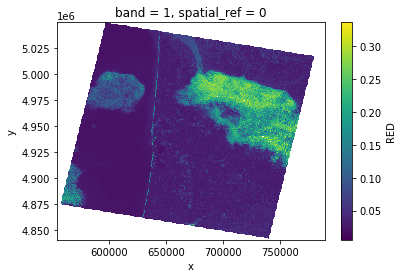

In [1]:
# Imports
import os
from dask.distributed import Client, LocalCluster
from eoreader.reader import Reader
from eoreader.bands.alias import *
from eoreader.env_vars import USE_DASK

# Ensure EOReader uses dask
os.environ[USE_DASK] = "1"

# Create local cluster
with LocalCluster(
        n_workers=4, threads_per_worker=4, processes=True
) as cluster, Client(cluster):

    # Create the reader
    eoreader = Reader()

    # Open your product
    path = os.path.join("/home", "data", "DATA", "PRODS", "LANDSATS_COL2", "LM05_L1TP_200029_19841014_20200902_02_T2.tar")
    prod = eoreader.open(path, remove_tmp=True)

    # Load this band
    band_dict = prod.load(RED)

# Plot band
band_dict[RED][:, ::10, ::10].plot()